In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

**In this code, we are dividing the entire Karnataka state into different administrative divisions, to check if we can get a better linear model for each division rather than assuming one for the whole state**

In [23]:
df_values = pd.read_excel('5_parameters_data.xlsx')

In [24]:
Belgaum_division = ['BAGALKOT', 'BELAGAVI', 'DHARAWAD', 'GADAG', 'HAVERI', 'UTTARA KANNADA', 'VIJAYAPURA']

In [25]:
Kalburgi_division = ['BALLARI', 'BIDAR', 'YADGIRI', 'RAICHUR', 'KOPPAL', 'KALABURAGI']

In [26]:
Mysore_division = ['MYSURU', 'CHAMARAJANAGAR', 'CHIKKAMAGALURU', 'DAKSHINA KANNADA', 'HASSAN', 'KODAGU', 'MANDYA', 'UDUPI']

In [27]:
Bengaluru_division = ['BENGALURU', 'BENGALURU(R)', 'CHIKKABALLAPURA', 'CHITRADURGA', 'DAVANAGERE', 'KOLAR', 'RAMANAGARA', 'SHIVAMOGGA', 'TUMAKURU']

In [28]:
division_dict = {
    'Belgaum_division': Belgaum_division,
    'Kalburgi_division': Kalburgi_division,
    'Mysore_division': Mysore_division,
    'Bengaluru_division': Bengaluru_division
}

district_to_division = {district: division for division, districts in division_dict.items() for district in districts}

df_values['Division'] = df_values['District'].map(district_to_division)

In [29]:
df_values

,District,Rice_Production_223,NetAreaIrrigated_Tanks_NetAreaIrrigated_176,NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_183,NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_NetIrrigatedArea_185,AreaUnderCereals_Paddy_190,TotalNPK_315,Division
0,BENGALURU,3376,164,0,0,782,23310,Bengaluru_division
1,BENGALURU(R),2354,0,1,35,736,19259,Bengaluru_division
2,RAMANAGARA,12128,1688,4,425,4468,7472,Bengaluru_division
3,CHITRADURGA,4566,0,107,0,1297,35884,Bengaluru_division
4,DAVANAGERE,489505,1534,1562,6610,98259,99644,Bengaluru_division
5,KOLAR,864,0,0,0,395,22190,Bengaluru_division
6,CHIKKABALLAPURA,2698,0,21,0,1333,28357,Bengaluru_division
7,SHIVAMOGGA,384974,50951,4152,3848,109617,56609,Bengaluru_division
8,TUMAKURU,26042,8998,9,0,10379,38148,Bengaluru_division
9,CHIKKAMAGALURU,110533,6384,4075,110,33036,67863,Mysore_division


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

parameters = ['Rice_Production','Tank Irrigation', 'LiftIrrigation Count',
              'LiftIrrigation Area', 'Area (Paddy)','Total NPK']

df_values = df_values.drop('District', axis = 1)
df_values

df_values.rename(columns = {'Rice_Production_223': 'Rice_Production'}, inplace = True)

In [31]:
df_values['Division']

0     Bengaluru_division
1     Bengaluru_division
2     Bengaluru_division
3     Bengaluru_division
4     Bengaluru_division
5     Bengaluru_division
6     Bengaluru_division
7     Bengaluru_division
8     Bengaluru_division
9        Mysore_division
10       Mysore_division
11       Mysore_division
12       Mysore_division
13       Mysore_division
14       Mysore_division
15       Mysore_division
16       Mysore_division
17      Belgaum_division
18      Belgaum_division
19      Belgaum_division
20      Belgaum_division
21      Belgaum_division
22      Belgaum_division
23      Belgaum_division
24     Kalburgi_division
25     Kalburgi_division
26     Kalburgi_division
27     Kalburgi_division
28     Kalburgi_division
29     Kalburgi_division
Name: Division, dtype: object

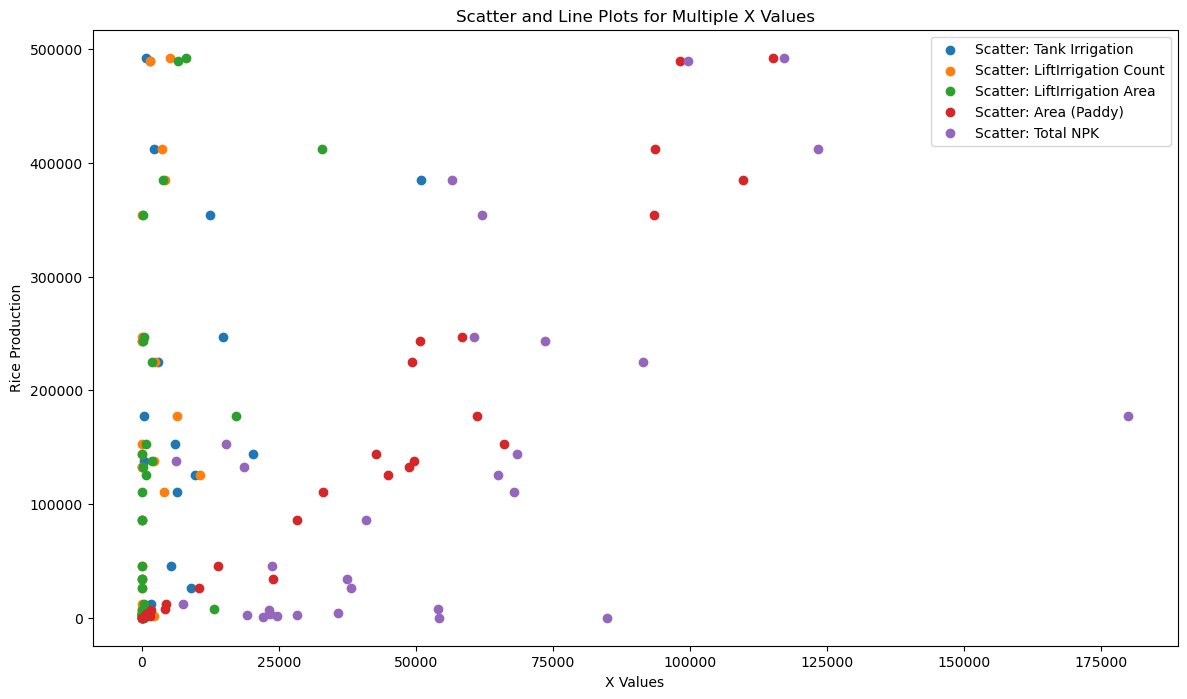

In [32]:


for parameter, column_name in zip(parameters, df_values.columns):
    if(column_name != 'Rice_Production'):
        df_values.rename(columns = {column_name: parameter}, inplace = True )

parameters = ['Tank Irrigation', 'LiftIrrigation Count',
              'LiftIrrigation Area', 'Area (Paddy)','Total NPK']

# List of x columns
x_columns = parameters
y_column = 'Rice_Production'

# Create a plot
plt.figure(figsize=(14, 8))

# Plot scatter and line for each x column
for x in x_columns:
    plt.scatter(df_values[x], df_values[y_column], label=f'Scatter: {x}')

# Adding title and labels
plt.title('Scatter and Line Plots for Multiple X Values')
plt.xlabel('X Values')
plt.ylabel('Rice Production')

# Adding legend
plt.legend()

# Show the plot
plt.show()


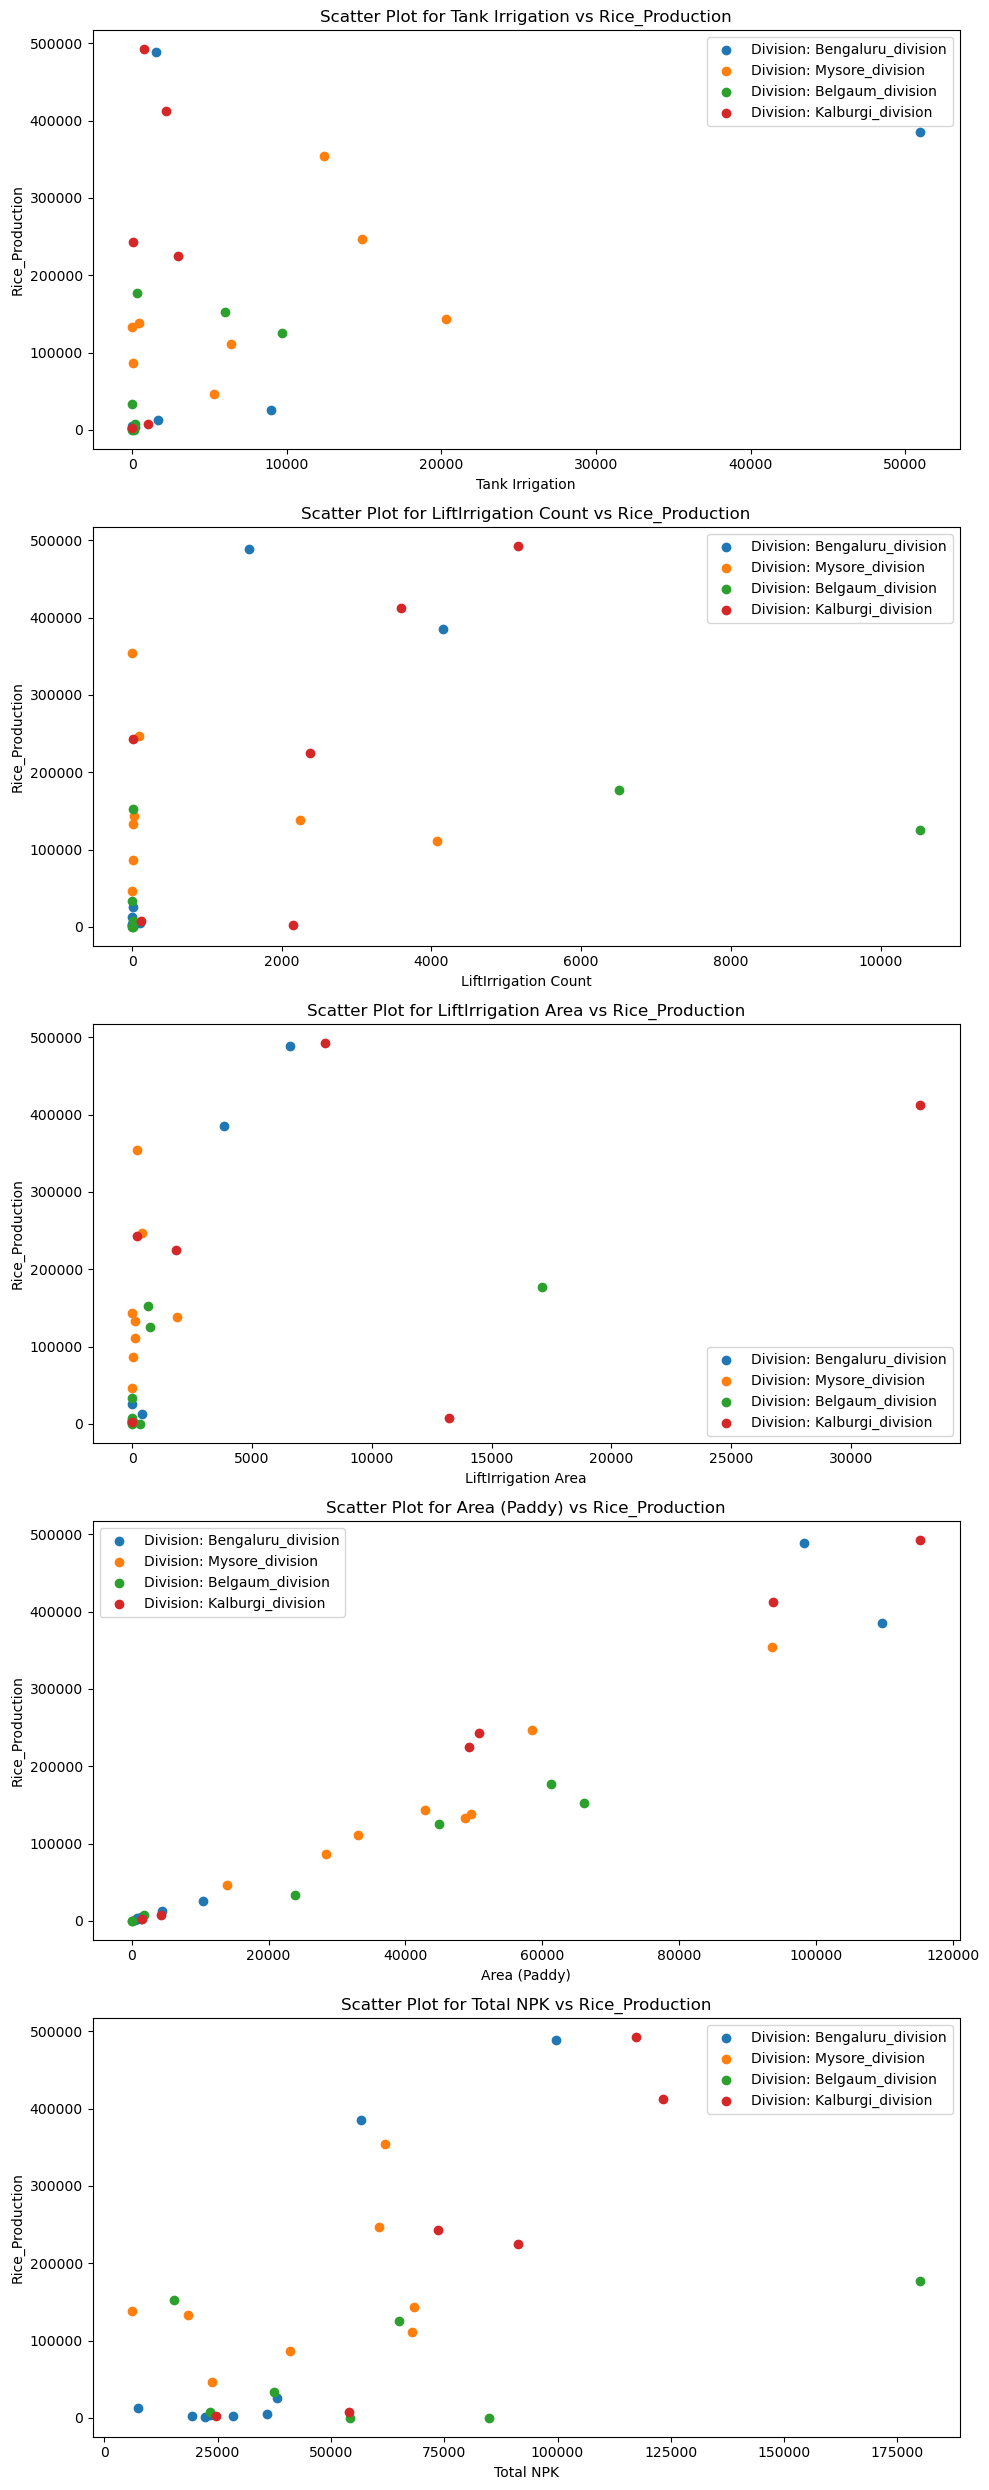

In [33]:
# Number of subplots
n = len(x_columns)
division_column = 'Division'
# Create subplots
fig, axs = plt.subplots(n, 1, figsize=(10, 5 * n))

# Plot each x column
for i, x in enumerate(x_columns):
    for division in df_values[division_column].unique():
        subset = df_values[df_values[division_column] == division]
        axs[i].scatter(subset[x], subset[y_column], label=f'Division: {division}')
    axs[i].set_title(f'Scatter Plot for {x} vs {y_column}')
    axs[i].set_xlabel(x)
    axs[i].set_ylabel(y_column)
    axs[i].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [34]:
df_values[df_values['Division'] == 'Belgaum_division']

,Rice_Production,Tank Irrigation,LiftIrrigation Count,LiftIrrigation Area,Area (Paddy),Total NPK,Division
17,177552,307,6503,17092,61230,179992,Belgaum_division
18,170,0,2,0,51,54228,Belgaum_division
19,85,140,19,320,32,84812,Belgaum_division
20,33989,0,0,0,23909,37381,Belgaum_division
21,7258,184,12,0,1706,23280,Belgaum_division
22,125422,9698,10529,753,44968,65001,Belgaum_division
23,152981,6020,16,676,66147,15316,Belgaum_division


In [35]:
corr = df_values[df_values['Division'] == 'Belgaum_division'].drop('Division', axis=1).corr(method='pearson')
print('Correlation matrix for Belgaum division')
corr

Correlation matrix for Belgaum division


,Rice_Production,Tank Irrigation,LiftIrrigation Count,LiftIrrigation Area,Area (Paddy),Total NPK
Rice_Production,1.000000,0.561896,0.626451,0.636309,0.978862,0.429329
Tank Irrigation,0.561896,1.000000,0.634208,-0.182771,0.568835,-0.213474
LiftIrrigation Count,0.626451,0.634208,1.000000,0.444688,0.515633,0.508832
LiftIrrigation Area,0.636309,-0.182771,0.444688,1.000000,0.531400,0.903740
Area (Paddy),0.978862,0.568835,0.515633,0.531400,1.000000,0.294524
Total NPK,0.429329,-0.213474,0.508832,0.903740,0.294524,1.000000


In [36]:
corr = df_values[df_values['Division'] == 'Mysore_division'].drop('Division', axis=1).corr(method='pearson')
print('Correlation matrix for Mysore division')
corr

Correlation matrix for Mysore division


,Rice_Production,Tank Irrigation,LiftIrrigation Count,LiftIrrigation Area,Area (Paddy),Total NPK
Rice_Production,1.000000,0.494311,-0.214837,0.069978,0.967707,0.436083
Tank Irrigation,0.494311,1.000000,-0.237019,-0.314449,0.358729,0.773546
LiftIrrigation Count,-0.214837,-0.237019,1.000000,0.360637,-0.173192,0.063807
LiftIrrigation Area,0.069978,-0.314449,0.360637,1.000000,0.188544,-0.550300
Area (Paddy),0.967707,0.358729,-0.173192,0.188544,1.000000,0.285905
Total NPK,0.436083,0.773546,0.063807,-0.550300,0.285905,1.000000


In [37]:
corr = df_values[df_values['Division'] == 'Bengaluru_division'].drop('Division', axis=1).corr(method='pearson')
print('Correlation matrix for Bengaluru division')
corr

Correlation matrix for Bengaluru division


,Rice_Production,Tank Irrigation,LiftIrrigation Count,LiftIrrigation Area,Area (Paddy),Total NPK
Rice_Production,1.000000,0.550557,0.815946,0.985666,0.979573,0.906821
Tank Irrigation,0.550557,1.000000,0.917027,0.408074,0.706971,0.292172
LiftIrrigation Count,0.815946,0.917027,1.000000,0.714750,0.912746,0.584880
LiftIrrigation Area,0.985666,0.408074,0.714750,1.000000,0.933493,0.918902
Area (Paddy),0.979573,0.706971,0.912746,0.933493,1.000000,0.836286
Total NPK,0.906821,0.292172,0.584880,0.918902,0.836286,1.000000


In [38]:
corr = df_values[df_values['Division'] == 'Kalburgi_division'].drop('Division', axis=1).corr(method='pearson')
print('Correlation matrix for Kalburgi division')
corr

Correlation matrix for Kalburgi division


,Rice_Production,Tank Irrigation,LiftIrrigation Count,LiftIrrigation Area,Area (Paddy),Total NPK
Rice_Production,1.000000,0.303616,0.732687,0.403243,0.998008,0.939817
Tank Irrigation,0.303616,1.000000,0.295287,0.427907,0.299838,0.563578
LiftIrrigation Count,0.732687,0.295287,1.000000,0.318286,0.762281,0.645081
LiftIrrigation Area,0.403243,0.427907,0.318286,1.000000,0.418917,0.569322
Area (Paddy),0.998008,0.299838,0.762281,0.418917,1.000000,0.938399
Total NPK,0.939817,0.563578,0.645081,0.569322,0.938399,1.000000


In [39]:
features = df_values.drop('Division', axis=1).drop('Rice_Production', axis = 1)
actual_values = df_values['Rice_Production']
train_features = sm.add_constant(features)

In [40]:
model = sm.OLS(actual_values, train_features).fit()
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['ViF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return vif_data

vif_total = calculate_vif(features)
print('We now get the Variance Inflation factor for all the districts')
print(vif_total)

We now get the Variance Inflation factor for all the districts
               Variable       ViF
0       Tank Irrigation  1.766089
1  LiftIrrigation Count  1.964956
2   LiftIrrigation Area  1.948150
3          Area (Paddy)  4.115364
4             Total NPK  4.012632


**From here on, we do a division-wise analysis of each administrative division to see how each division can have a model of it's own, and then use 
linear regression on each of the division assuming that each division follows a linear model of prediction**

In [41]:
features_Belgaum = df_values[df_values['Division'] == 'Belgaum_division'].drop('Division', axis=1).drop('Rice_Production', axis = 1)
actual_values_Belgaum = df_values[df_values['Division'] == 'Belgaum_division']['Rice_Production']
train_features_Belgaum = sm.add_constant(features_Belgaum)

In [43]:
model = sm.OLS(actual_values_Belgaum, train_features_Belgaum).fit()
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['ViF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return vif_data

vif_Belgaum = calculate_vif(features_Belgaum)
print('We now get the Variance Inflation factor for districts in Belgaum division')
print(vif_Belgaum)

We now get the Variance Inflation factor for districts in Belgaum division
               Variable        ViF
0       Tank Irrigation  28.497153
1  LiftIrrigation Count  14.679056
2   LiftIrrigation Area  18.035817
3          Area (Paddy)  19.657143
4             Total NPK   4.527525


In [44]:
features_Kalburgi = df_values[df_values['Division'] == 'Kalburgi_division'].drop('Division', axis=1).drop('Rice_Production', axis = 1)
actual_values_Kalburgi = df_values[df_values['Division'] == 'Kalburgi_division']['Rice_Production']
train_features_Kalburgi = sm.add_constant(features_Kalburgi)

In [45]:
model = sm.OLS(actual_values_Kalburgi, train_features_Kalburgi).fit()
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['ViF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return vif_data

vif_Kalburgi = calculate_vif(features_Kalburgi)
print('We now get the Variance Inflation factor for districts in Kalburgi division')
print(vif_Kalburgi)

We now get the Variance Inflation factor for districts in Kalburgi division
               Variable        ViF
0       Tank Irrigation   4.180777
1  LiftIrrigation Count   5.855542
2   LiftIrrigation Area   2.393542
3          Area (Paddy)  17.434486
4             Total NPK  21.090574


In [46]:
features_Bengaluru = df_values[df_values['Division'] == 'Bengaluru_division'].drop('Division', axis=1).drop('Rice_Production', axis = 1)
actual_values_Bengaluru = df_values[df_values['Division'] == 'Bengaluru_division']['Rice_Production']
train_features_Bengaluru = sm.add_constant(features_Bengaluru)

In [47]:
model = sm.OLS(actual_values_Bengaluru, train_features_Bengaluru).fit()
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['ViF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return vif_data

vif_Bengaluru = calculate_vif(features_Bengaluru)
print(vif_Bengaluru)

               Variable          ViF
0       Tank Irrigation   226.773727
1  LiftIrrigation Count    77.861516
2   LiftIrrigation Area   995.763836
3          Area (Paddy)  2022.534188
4             Total NPK     6.985677


In [48]:
features_Mysore = df_values[df_values['Division'] == 'Mysore_division'].drop('Division', axis=1).drop('Rice_Production', axis = 1)
actual_values_Mysore = df_values[df_values['Division'] == 'Mysore_division']['Rice_Production']
train_features_Mysore = sm.add_constant(features_Mysore)

In [49]:
model = sm.OLS(actual_values_Mysore, train_features_Mysore).fit()
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['ViF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return vif_data

vif_Mysore = calculate_vif(features_Mysore)
print(vif_Mysore)

               Variable        ViF
0       Tank Irrigation   7.411397
1  LiftIrrigation Count   3.572982
2   LiftIrrigation Area   4.044037
3          Area (Paddy)  10.286213
4             Total NPK  21.617129


In [50]:

# Assuming train_features is your DataFrame and actual_values is your Series
X = train_features.values
y = actual_values.values

# Compute the coefficients using the normal equation
X_transpose_X = np.dot(X.T, X)
X_transpose_y = np.dot(X.T, y)
coefficients = np.linalg.solve(X_transpose_X, X_transpose_y)

# Predicted values
predicted_values = np.dot(X, coefficients)

# Create a pandas Series for predicted values
predicted_values = pd.Series(predicted_values, index=train_features.index)
print(predicted_values)

0     -13550.252579
1     -15518.510668
2      -7325.664434
3      -6037.332753
4     408348.961662
5     -15517.039869
6      -8918.243719
7     377508.833319
8      25095.951427
9     108841.229015
10    179318.425262
11    163172.157244
12    161931.153733
13    106921.236364
14    226111.415198
15    371950.356558
16     35701.532213
17    266119.728034
18     -1822.523917
19     12288.571597
20     87363.159562
21     -9892.594296
22    114117.638926
23    243753.233089
24    386822.321921
25    -22722.282635
26     12886.030688
27    199424.072599
28    464572.961500
29    213591.474958
dtype: float64


In [51]:

# Assuming train_features is your DataFrame and actual_values is your Series
X = train_features_Belgaum.values
y = actual_values_Belgaum.values

# Compute the coefficients using the normal equation
X_transpose_X = np.dot(X.T, X)
X_transpose_y = np.dot(X.T, y)
coefficients = np.linalg.solve(X_transpose_X, X_transpose_y)

# Predicted values
predicted_values_Belgaum = np.dot(X, coefficients)

# Create a pandas Series for predicted values
predicted_values_Belgaum = pd.Series(predicted_values_Belgaum, index=train_features_Belgaum.index)
print(predicted_values_Belgaum)

17    177550.794750
18        24.812027
19       157.777661
20     33999.172927
21      7325.485041
22    125422.570741
23    152976.386852
dtype: float64


In [52]:

# Assuming train_features is your DataFrame and actual_values is your Series
X = train_features_Mysore.values
y = actual_values_Mysore.values

# Compute the coefficients using the normal equation
X_transpose_X = np.dot(X.T, X)
X_transpose_y = np.dot(X.T, y)
coefficients = np.linalg.solve(X_transpose_X, X_transpose_y)

# Predicted values
predicted_values_Mysore = np.dot(X, coefficients)

# Create a pandas Series for predicted values
predicted_values_Mysore = pd.Series(predicted_values_Mysore, index=train_features_Mysore.index)
print(predicted_values_Mysore)

9     108351.557457
10    146107.920940
11    142766.803696
12    170061.052390
13     93892.548250
14    223422.979235
15    348769.611482
16     24538.526549
dtype: float64


In [53]:
actual_values_Kalburgi

24    412231
25      2036
26      7888
27    224659
28    492342
29    243505
Name: Rice_Production, dtype: int64

In [54]:

# Assuming train_features is your DataFrame and actual_values is your Series
X = train_features_Kalburgi.values
y = actual_values_Kalburgi.values

# Compute the coefficients using the normal equation
X_transpose_X = np.dot(X.T, X)
X_transpose_y = np.dot(X.T, y)
coefficients = np.linalg.solve(X_transpose_X, X_transpose_y)

# Predicted values
predicted_values_Kalburgi = np.dot(X, coefficients)

# Create a pandas Series for predicted values
predicted_values_Kalburgi = pd.Series(predicted_values_Kalburgi, index=train_features_Kalburgi.index)
print(predicted_values_Kalburgi)

24    412231.0
25      2036.0
26      7888.0
27    224659.0
28    492342.0
29    243505.0
dtype: float64


In [55]:

# Assuming train_features is your DataFrame and actual_values is your Series
X = train_features_Bengaluru.values
y = actual_values_Bengaluru.values

# Compute the coefficients using the normal equation
X_transpose_X = np.dot(X.T, X)
X_transpose_y = np.dot(X.T, y)
coefficients = np.linalg.solve(X_transpose_X, X_transpose_y)

# Predicted values
predicted_values_Bengaluru = np.dot(X, coefficients)

# Create a pandas Series for predicted values
predicted_values_Bengaluru = pd.Series(predicted_values_Bengaluru, index=train_features_Bengaluru.index)
print(predicted_values_Bengaluru)
print(actual_values_Bengaluru)

0      1829.106376
1      1825.533362
2     12649.699378
3      4159.176994
4    489468.777780
5        85.275647
6      5580.796293
7    384983.408257
8     25925.225915
dtype: float64
0      3376
1      2354
2     12128
3      4566
4    489505
5       864
6      2698
7    384974
8     26042
Name: Rice_Production, dtype: int64


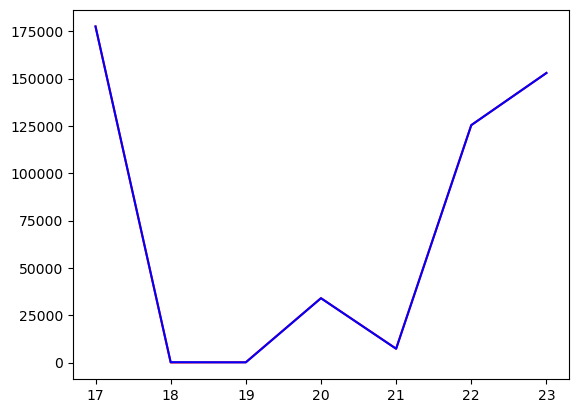

In [56]:
dict = [predicted_values_Belgaum, actual_values_Belgaum]
plt.plot(predicted_values_Belgaum.index, predicted_values_Belgaum, color='red')
plt.plot(actual_values_Belgaum, color= 'blue')
plt.show()

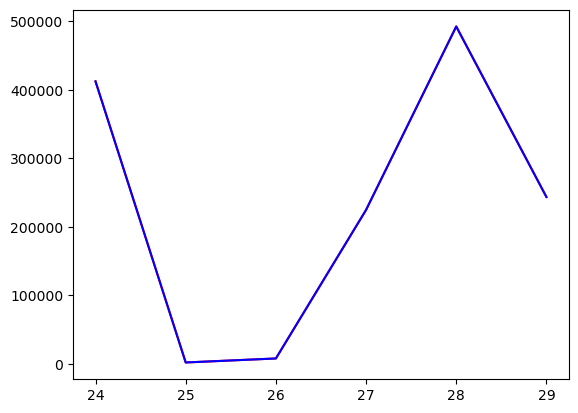

In [57]:
dict = [predicted_values_Kalburgi, actual_values_Kalburgi]
plt.plot(dict[0], color='red')
plt.plot(dict[1], color= 'blue')
plt.show()

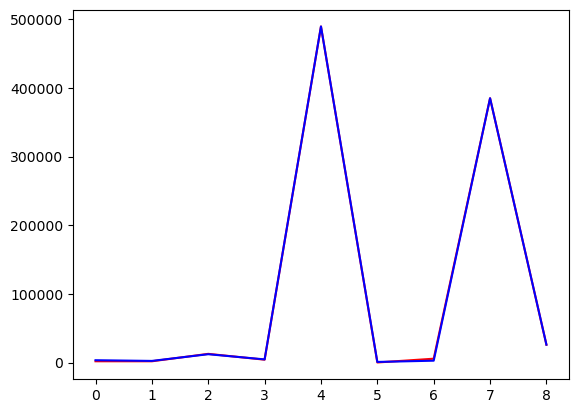

In [58]:
dict = [predicted_values_Bengaluru, actual_values_Bengaluru]
plt.plot(dict[0], color='red')
plt.plot(dict[1], color= 'blue')
plt.show()

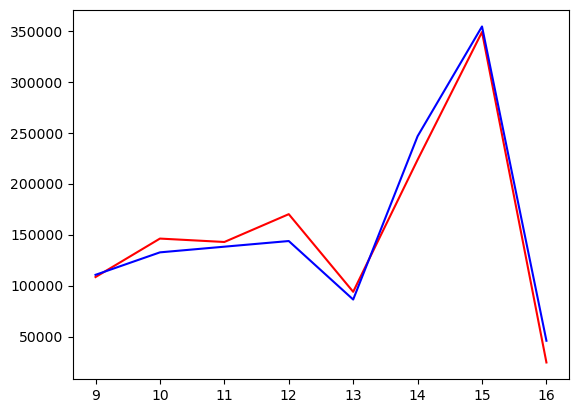

In [59]:
dict = [predicted_values_Mysore, actual_values_Mysore]
plt.plot(dict[0], color='red')
plt.plot(dict[1], color= 'blue')
plt.show()

**Here we can see that the linear model is fitting on the dataset, and the predicted values overlap with the actual values in each of the cases**

In [60]:
df_values['residuals'] = actual_values - predicted_values
df_values['predicted'] = predicted_values
# Compute the variance of residuals
variance_residuals = np.var(df_new['residuals'], ddof=1)  # ddof=1 for sample variance

print("Variance of Residuals:", variance_residuals)

# Plot Residuals vs. Predicted Values to check for homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, df_values['residuals'], color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values for all districts')
plt.show()

# Optional: Breusch-Pagan test for homoscedasticity
# Adding a constant to the model
X = sm.add_constant(df_values['predicted'])
results = sm.OLS(df_values['residuals'], X).fit()
test_results = sm.stats.diagnostic.het_breuschpagan(results.resid, X)

print("Breusch-Pagan Test for all districts")
print(f"LM Statistic: {test_results[0]}, p-value: {test_results[1]}")

NameError: name 'df_new' is not defined

In [ ]:
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import jarque_bera

# 1. Histogram and QQ-Plot for residuals
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_values['residuals'], kde=True, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')

# QQ-Plot
plt.subplot(1, 2, 2)
qqplot(df_values['residuals'], line='s', ax=plt.gca())
plt.title('QQ-Plot of Residuals')

plt.tight_layout()
plt.show()

# 2. Shapiro-Wilk Test
shapiro_test = stats.shapiro(df_values['residuals'])
print("Shapiro-Wilk Test")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 3. Skewness and Kurtosis
skewness = df_values['residuals'].skew()
kurtosis = df_values['residuals'].kurtosis()
print(f'Skewness: {skewness}, Kurtosis: {kurtosis}')

# 4. Jarque-Bera Test
jb_test = jarque_bera(df_values['residuals'])
print("Jarque-Bera Test")
print(f"Statistic: {jb_test[0]}, p-value: {jb_test[1]}")

In [ ]:
df_new = pd.DataFrame()
df_new['residuals'] = actual_values_Bengaluru - predicted_values_Bengaluru
df_new['predicted'] = predicted_values_Bengaluru
# Compute the variance of residuals
variance_residuals = np.var(df_new['residuals'], ddof=1)  # ddof=1 for sample variance

print("Variance of Residuals:", variance_residuals)

# Plot Residuals vs. Predicted Values to check for homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values_Bengaluru, df_new['residuals'], color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values for Bengaluru division')
plt.show()

# Optional: Breusch-Pagan test for homoscedasticity
# Adding a constant to the model
X = sm.add_constant(df_new['predicted'])
results = sm.OLS(df_new['residuals'], X).fit()
test_results = sm.stats.diagnostic.het_breuschpagan(results.resid, X)

print("Breusch-Pagan Test for Bengaluru division")
print(f"LM Statistic: {test_results[0]}, p-value: {test_results[1]}")

Variance of Residuals: 5176.152352443435


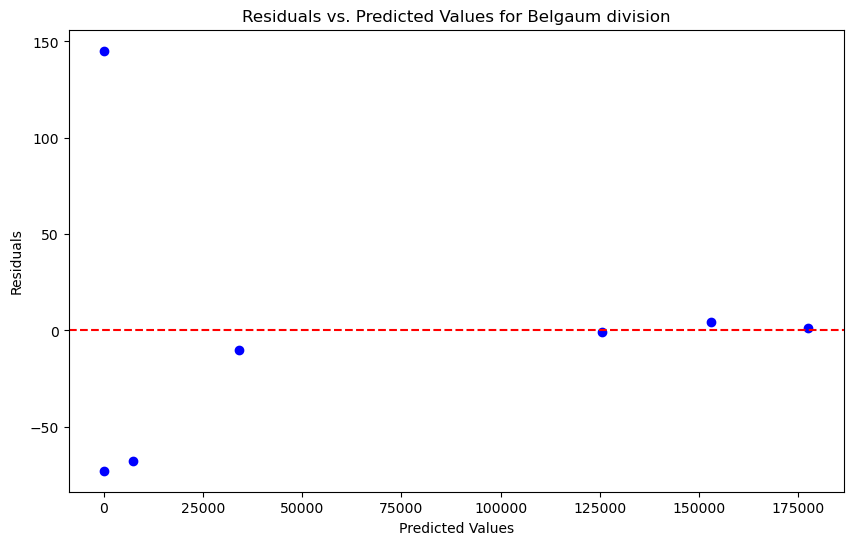

Breusch-Pagan Test for Bengaluru division
LM Statistic: 2.5292132915001617, p-value: 0.11175592207387453


In [61]:
df_new = pd.DataFrame()
df_new['residuals'] = actual_values_Belgaum - predicted_values_Belgaum
df_new['predicted'] = predicted_values_Belgaum
# Compute the variance of residuals
variance_residuals = np.var(df_new['residuals'], ddof=1)  # ddof=1 for sample variance

print("Variance of Residuals:", variance_residuals)

# Plot Residuals vs. Predicted Values to check for homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values_Belgaum, df_new['residuals'], color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values for Belgaum division')
plt.show()

# Optional: Breusch-Pagan test for homoscedasticity
# Adding a constant to the model
X = sm.add_constant(df_new['predicted'])
results = sm.OLS(df_new['residuals'], X).fit()
test_results = sm.stats.diagnostic.het_breuschpagan(results.resid, X)

print("Breusch-Pagan Test for Belgaum division")
print(f"LM Statistic: {test_results[0]}, p-value: {test_results[1]}")

Variance of Residuals: 1.067945316180129e-20


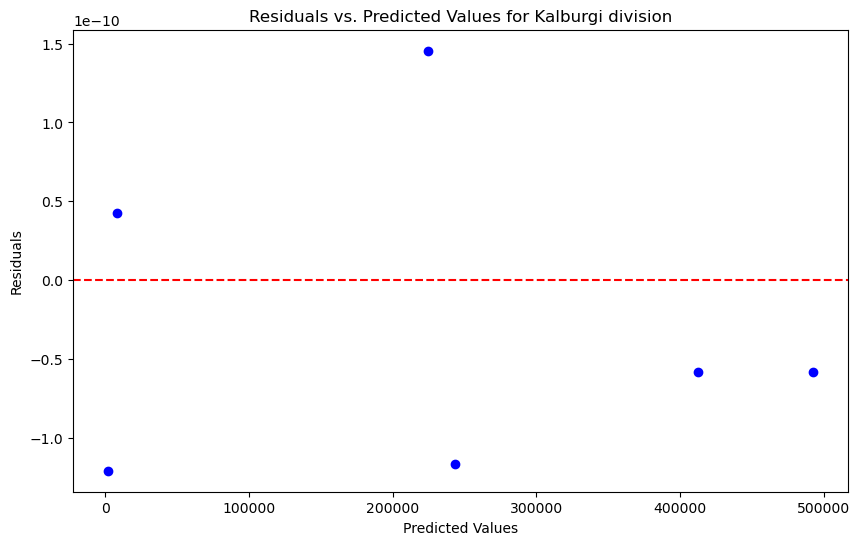

Breusch-Pagan Test for Bengaluru division
LM Statistic: 0.48483081393827554, p-value: 0.4862422662863638


In [62]:
df_new = pd.DataFrame()
df_new['residuals'] = actual_values_Kalburgi - predicted_values_Kalburgi
df_new['predicted'] = predicted_values_Kalburgi
# Compute the variance of residuals
variance_residuals = np.var(df_new['residuals'], ddof=1)  # ddof=1 for sample variance

print("Variance of Residuals:", variance_residuals)

# Plot Residuals vs. Predicted Values to check for homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values_Kalburgi, df_new['residuals'], color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values for Kalburgi division')
plt.show()

# Optional: Breusch-Pagan test for homoscedasticity
# Adding a constant to the model
X = sm.add_constant(df_new['predicted'])
results = sm.OLS(df_new['residuals'], X).fit()
test_results = sm.stats.diagnostic.het_breuschpagan(results.resid, X)

print("Breusch-Pagan Test for Bengaluru division")
print(f"LM Statistic: {test_results[0]}, p-value: {test_results[1]}")

Variance of Residuals: 282828904.09688723


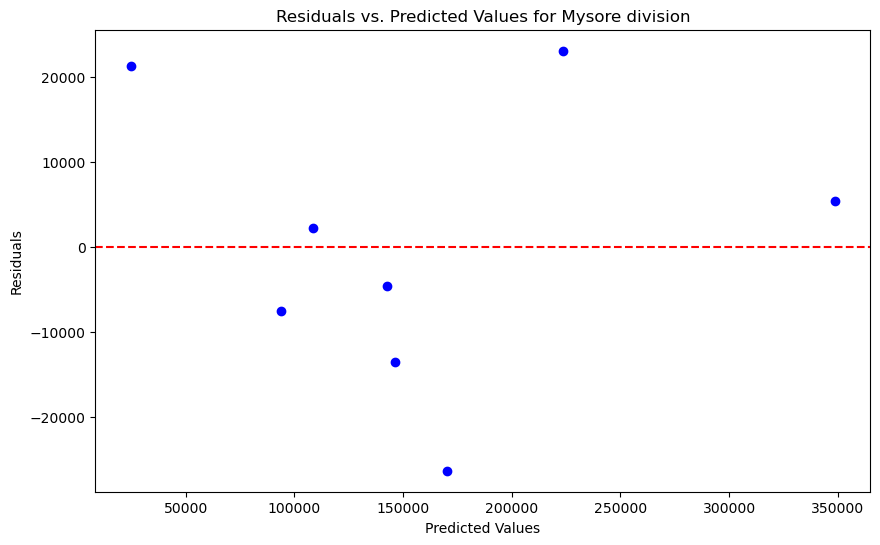

Breusch-Pagan Test for Bengaluru division
LM Statistic: 0.06381514337824612, p-value: 0.8005645059703057


In [63]:
df_new = pd.DataFrame()
df_new['residuals'] = actual_values_Mysore - predicted_values_Mysore
df_new['predicted'] = predicted_values_Mysore
# Compute the variance of residuals
variance_residuals = np.var(df_new['residuals'], ddof=1)  # ddof=1 for sample variance

print("Variance of Residuals:", variance_residuals)

# Plot Residuals vs. Predicted Values to check for homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values_Mysore, df_new['residuals'], color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values for Mysore division')
plt.show()

# Optional: Breusch-Pagan test for homoscedasticity
# Adding a constant to the model
X = sm.add_constant(df_new['predicted'])
results = sm.OLS(df_new['residuals'], X).fit()
test_results = sm.stats.diagnostic.het_breuschpagan(results.resid, X)

print("Breusch-Pagan Test for Bengaluru division")
print(f"LM Statistic: {test_results[0]}, p-value: {test_results[1]}")

D:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


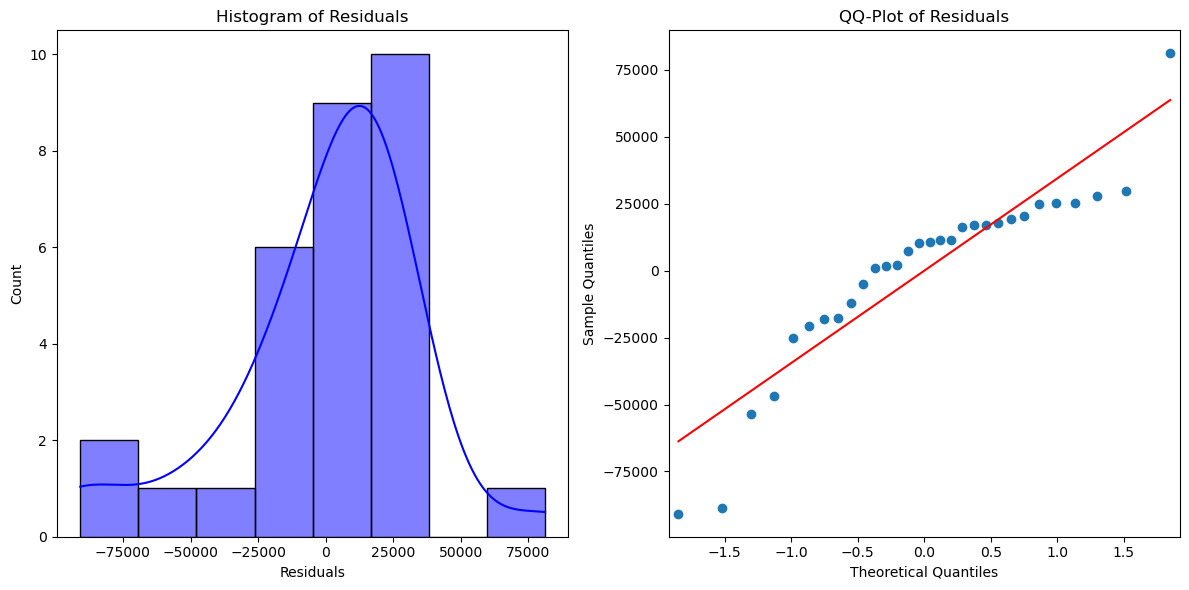

Shapiro-Wilk Test
Statistic: 0.8854649662971497, p-value: 0.0037731092888861895
Skewness: -0.911384459294025, Kurtosis: 1.9931547171992086
Jarque-Bera Test
Statistic: 6.490065764294208, p-value: 0.0389672830082865


In [64]:
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import jarque_bera

# 1. Histogram and QQ-Plot for residuals
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_values['residuals'], kde=True, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')

# QQ-Plot
plt.subplot(1, 2, 2)
qqplot(df_values['residuals'], line='s', ax=plt.gca())
plt.title('QQ-Plot of Residuals')

plt.tight_layout()
plt.show()

# 2. Shapiro-Wilk Test
shapiro_test = stats.shapiro(df_values['residuals'])
print("Shapiro-Wilk Test")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 3. Skewness and Kurtosis
skewness = df_values['residuals'].skew()
kurtosis = df_values['residuals'].kurtosis()
print(f'Skewness: {skewness}, Kurtosis: {kurtosis}')

# 4. Jarque-Bera Test
jb_test = jarque_bera(df_values['residuals'])
print("Jarque-Bera Test")
print(f"Statistic: {jb_test[0]}, p-value: {jb_test[1]}")

D:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


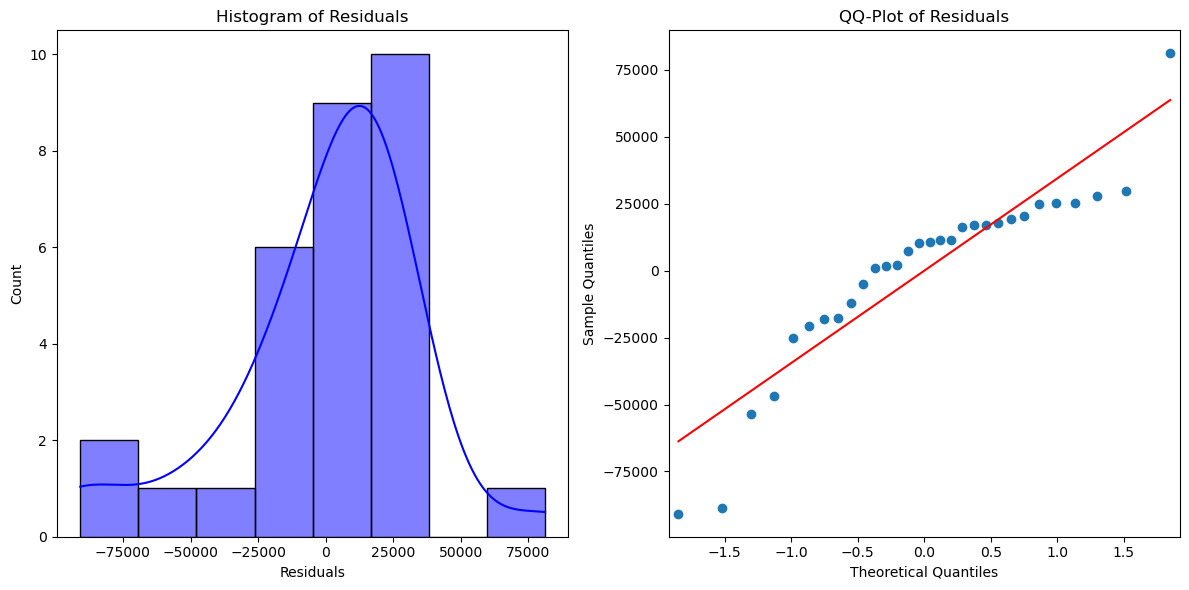

Shapiro-Wilk Test
Statistic: 0.8854649662971497, p-value: 0.0037731092888861895
Skewness: -0.911384459294025, Kurtosis: 1.9931547171992086
Jarque-Bera Test
Statistic: 6.490065764294208, p-value: 0.0389672830082865


In [65]:
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import jarque_bera

# 1. Histogram and QQ-Plot for residuals
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_values['residuals'], kde=True, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')

# QQ-Plot
plt.subplot(1, 2, 2)
qqplot(df_values['residuals'], line='s', ax=plt.gca())
plt.title('QQ-Plot of Residuals')

plt.tight_layout()
plt.show()

# 2. Shapiro-Wilk Test
shapiro_test = stats.shapiro(df_values['residuals'])
print("Shapiro-Wilk Test")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 3. Skewness and Kurtosis
skewness = df_values['residuals'].skew()
kurtosis = df_values['residuals'].kurtosis()
print(f'Skewness: {skewness}, Kurtosis: {kurtosis}')

# 4. Jarque-Bera Test
jb_test = jarque_bera(df_values['residuals'])
print("Jarque-Bera Test")
print(f"Statistic: {jb_test[0]}, p-value: {jb_test[1]}")

D:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


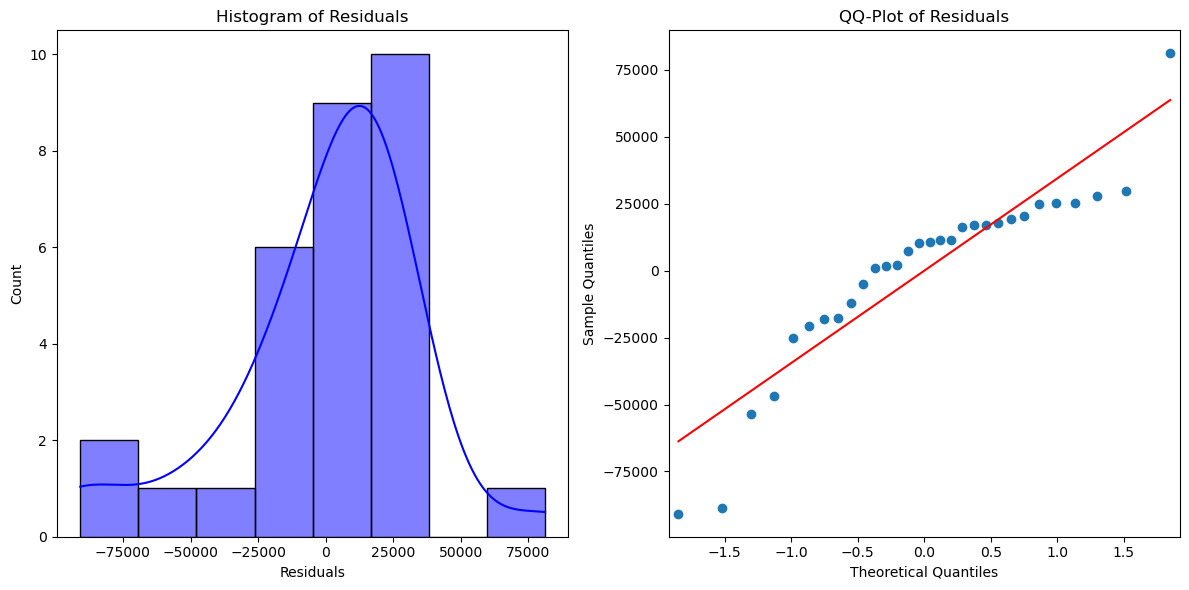

Shapiro-Wilk Test
Statistic: 0.8854649662971497, p-value: 0.0037731092888861895
Skewness: -0.911384459294025, Kurtosis: 1.9931547171992086
Jarque-Bera Test
Statistic: 6.490065764294208, p-value: 0.0389672830082865


In [66]:
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import jarque_bera

# 1. Histogram and QQ-Plot for residuals
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_values['residuals'], kde=True, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')

# QQ-Plot
plt.subplot(1, 2, 2)
qqplot(df_values['residuals'], line='s', ax=plt.gca())
plt.title('QQ-Plot of Residuals')

plt.tight_layout()
plt.show()

# 2. Shapiro-Wilk Test
shapiro_test = stats.shapiro(df_values['residuals'])
print("Shapiro-Wilk Test")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 3. Skewness and Kurtosis
skewness = df_values['residuals'].skew()
kurtosis = df_values['residuals'].kurtosis()
print(f'Skewness: {skewness}, Kurtosis: {kurtosis}')

# 4. Jarque-Bera Test
jb_test = jarque_bera(df_values['residuals'])
print("Jarque-Bera Test")
print(f"Statistic: {jb_test[0]}, p-value: {jb_test[1]}")